# Workflow for Class Cell_Data

by Pu Zheng

2018.10.11

Pu Zheng: updated this example to match version for 2018.12.20

# Imports

In [7]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import get_img_info, visual_tools, corrections, classes, alignment_tools, spot_tools
print(os.getpid())

24952


In [8]:
reload(ia.get_img_info)
reload(ia.spot_tools)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)
reload(ia.alignment_tools)

<module 'ImageAnalysis3.alignment_tools' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\alignment_tools.py'>

# Create Cell_Data object

## create cell_data class and load basic info

In [16]:
fov_id = 1
cell_id = 0
# specify initialization parameters:
param = {'data_folder':r'X:\20190627_IMR90_CTP05_DNA',
         'fov_id': fov_id,
         'cell_id': cell_id,
         'save_folder':r'\\dolly\Raw_data\puzheng\201907-DNA_unique',
         'experiment_type': 'DNA',
         'num_threads': 12,
         'correction_folder':r'D:\Corrections',
         'experiment_folder':r'X:\20190627_IMR90_CTP05_DNA\Experiment',
         };

# initialize cell_data class:
dna = ia.classes.Cell_Data(param)

# change some default settings
# change some global settings
dna.shared_parameters['num_empty_frames'] = 0
dna.shared_parameters['corr_Z_shift'] = False

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 266
- Number of field of views: 70
- Importing csv file: X:\20190627_IMR90_CTP05_DNA\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
-- 255 folders are found according to color-usage annotation.


## Load more info for cell

In [20]:
# load existing cell_info, dont run for the first time
dna._load_from_file('cell_info')
# load segmentation/
dna._load_segmentation(_force=False);
# load drift info
drift = dna._load_drift(_size=360, _coord_sel=[500,500], 
                        _dynamic=True, _num_threads=20, 
                        _sequential_mode=False,_force=False)

-- loading cell_info for fov:1, cell:0
- drift already exists for cell:0, skip


In [39]:
len(dna.unique_ims)

651

--- dump coordinate information into .\fitted_image.pkl


<IPython.core.display.Javascript object>


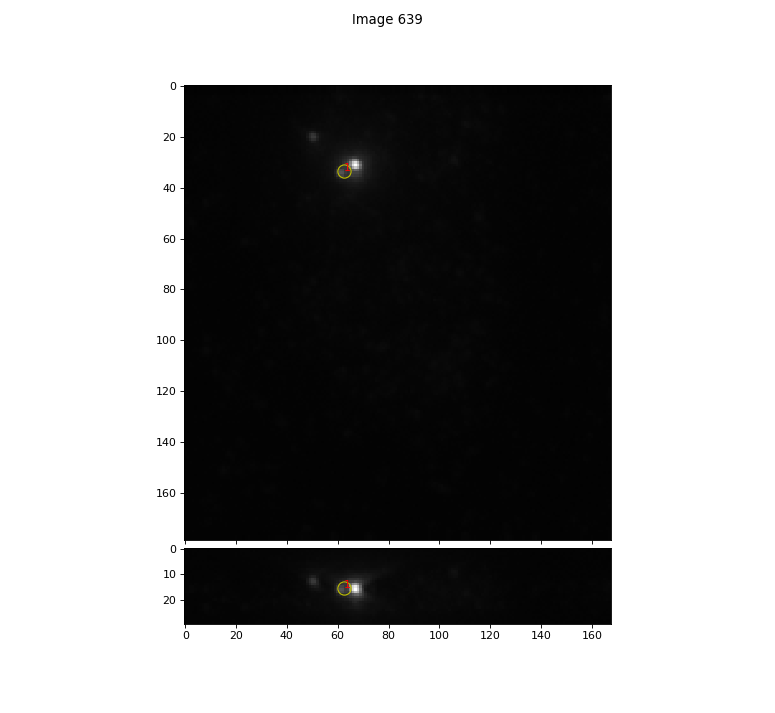

In [52]:
%matplotlib notebook
%matplotlib notebook

visualize_fitted_spot_images(dna.unique_ims, dna.EM_picked_unique_spots[0][:,1:4], np.array(dna.unique_ids)-1)

### test drift

- Correcting H153R153\Conv_zscan_69.dax, channel:488, params:10,0
-- correcting Z axis illumination shifts.
-- removing hot pixels
-- correcting illumination for image size:(30, 300, 400) for channel:488
- Correcting H154R154\Conv_zscan_69.dax, channel:488, params:10,0
-- correcting Z axis illumination shifts.
-- removing hot pixels
-- correcting illumination for image size:(30, 300, 400) for channel:488
- Correcting H155R155\Conv_zscan_69.dax, channel:488, params:10,0
-- correcting Z axis illumination shifts.
-- removing hot pixels
-- correcting illumination for image size:(30, 300, 400) for channel:488
- Correcting H156R156\Conv_zscan_69.dax, channel:488, params:10,0
-- correcting Z axis illumination shifts.
-- removing hot pixels
-- correcting illumination for image size:(30, 300, 400) for channel:488


<IPython.core.display.Javascript object>


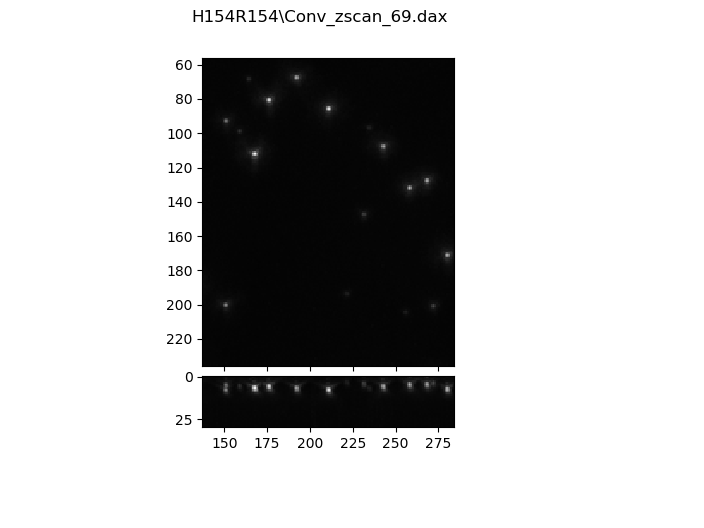

In [13]:
%matplotlib notebook
# check drift
crop = np.array([[0,30],[500,800],[500,900]])
data_folder = dna.data_folder[0]
test_ims = [corrections.correct_single_image(os.path.join(data_folder, _hyb_name), 488, num_empty_frames=0,
                                             correction_folder=dna.correction_folder,
                                             crop_limits=crop, drift=_dft, verbose=True)
                                              for _hyb_name, _dft in list(dna.drift.items())[0:4]]
%matplotlib notebook
#lst.cells[2]._load_from_file('unique')
#visual_tools.imshow_mark_3d_v2(lst.cells[2].unique_ims)
visual_tools.imshow_mark_3d_v2(test_ims, image_names=list(dna.drift)[0:4])

# Load and crop images from raw data

In [15]:
unique_ims, unique_ids, unique_channels = dna._crop_images('unique', 
                                                           _load_in_ram=True, 
                                                           _overwrite=True)

- Start cropping unique image
-- loading unique_rounds.npz, time:1.0935869216918945
- all channels in hyb:H0R0\Conv_zscan_69.dax don't have new unique regions, skip!
-- overwrite regions:369, 41 remains
-- overwrite regions:370, 40 remains
-- overwrite regions:368, 39 remains
-- overwrite regions:372, 38 remains
-- overwrite regions:373, 37 remains
-- overwrite regions:371, 36 remains
-- overwrite regions:376, 35 remains
-- overwrite regions:374, 34 remains
-- overwrite regions:375, 33 remains
-- overwrite regions:379, 32 remains
-- overwrite regions:377, 31 remains
-- overwrite regions:378, 30 remains
-- overwrite regions:382, 29 remains
-- overwrite regions:380, 28 remains
-- overwrite regions:381, 27 remains
-- overwrite regions:385, 26 remains
-- overwrite regions:383, 25 remains
-- overwrite regions:384, 24 remains
-- overwrite regions:388, 23 remains
-- overwrite regions:386, 22 remains
-- overwrite regions:387, 21 remains
-- overwrite regions:389, 20 remains
-- overwrite regions

## Save to file 

In [16]:
#dna._save_to_file('all') # save all

dna._save_to_file('cell_info') # save all cell_info exclude images
#dna._save_to_file('cell_info', _save_dic={'distance_zxy':a.distance_zxy}) # save specifically this variable

#dna._save_to_file('unique') # save unique info into unique_rounds.npz

#dna._save_to_file('combo') # save combo_groups into Harry's format

- saving cell_info to file:D:\Pu_Temp\IMR90_wt_DNA\fov-69\cell-0\cell_info.pkl
-- loading existing info from file: D:\Pu_Temp\IMR90_wt_DNA\fov-69\cell-0\cell_info.pkl
- Writing cell data to file: D:\Pu_Temp\IMR90_wt_DNA\fov-69\cell-0\cell_info.pkl


In [ ]:
# calculate channel specific background (not used for now)
dna._calculate_background(_verbose=True)

# Generate and Pick chromosome

## generate and identify chromosome

<IPython.core.display.Javascript object>


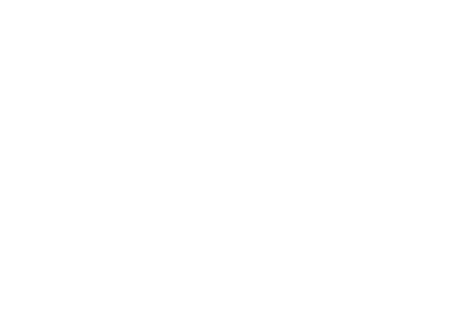

<IPython.core.display.Javascript object>


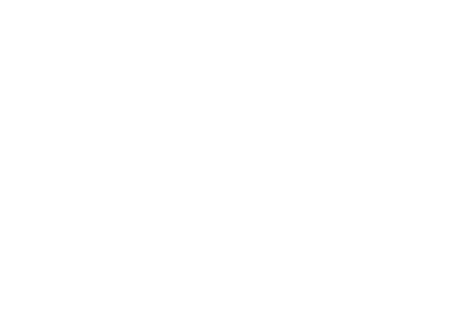

In [21]:
%matplotlib notebook
%matplotlib notebook
plt.figure()

-- cell:0 in fov:31 doesnot have unique_ims, trying to load now.


<IPython.core.display.Javascript object>


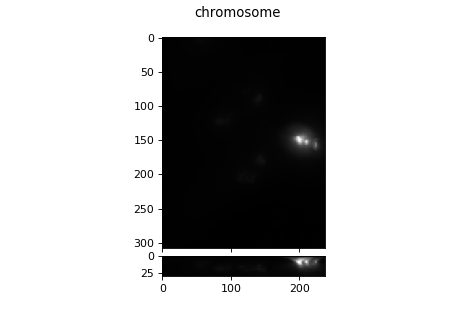

In [22]:
%matplotlib notebook
%matplotlib notebook

# generate
dna._generate_chromosome_image('unique', _max_count=90, _verbose=True)
# identify
dna._identify_chromosomes();
# manually pick for only this cell
dna._pick_chromosome_manual()
# then do manual picking and close the matplotlib notebook inferface.

## Update chromosome coordinate info

In [23]:
dna._update_chromosome_from_file();

-- 0 loaded
- saving cell_info to file:\\dolly\Raw_data\puzheng\201907-DNA_unique\fov-31\cell-0\cell_info.pkl
-- loading existing info from file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-31\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['num_threads', 'chrom_coords']
- Writing cell data to file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-31\cell-0\cell_info.pkl


# Fitting and picking spots for unique images

## Load unique images

In [22]:
# unique
dna._load_from_file('unique', _overwrite=False)

- Loading unique from file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-1\cell-0\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 19

In [78]:
dna._load_from_file('gene', _overwrite=False)

- Loading unique from file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-1\cell-0\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]


## multi-fitting

In [25]:
cand_spots = dna._multi_fitting_for_chromosome(_data_type='unique', _num_threads=32, 
                                               _overwrite=True, _save=True)

- Start multi-fitting for unique images
++ start fitting unique for fov:31, cell:0 with 32 threads
++ total time in fitting unique: 16.19318914413452
- saving cell_info to file:\\dolly\Raw_data\puzheng\201907-DNA_unique\fov-31\cell-0\cell_info.pkl
-- loading existing info from file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-31\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots', 'unique_ids']
- Writing cell data to file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-31\cell-0\cell_info.pkl


In [26]:
cand_spots = dna._multi_fitting_for_chromosome('gene', _num_threads=12, 
                                               _normalization=True,
                                               _min_seed_count=6, 
                                               _max_seed_count=12,
                                               _overwrite=True,
                                               _save=True)

- Start multi-fitting for gene images
-- no gene_ims info loaded to this cell, try loading:
- Loading unique from file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-31\cell-0\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
++ start fitting gene for fov:31, cell:0 with 12 threads
++ total time in fitting gene: 4.737699747085571
- saving cell_info to file:\\dolly\Raw_data\puzheng\201907-DNA_unique\fov-31\cell-0\cell_info.pkl
-- loading existing info from file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-31\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['gene_spots', 'gene_ids']
- Writing cell data to file: \\dolly\Raw_data\puzheng\201

## EM pick spots

In [53]:
from scipy.spatial.distance import pdist, squareform

In [11]:
%matplotlib inline
overwrite_distmap=True
reload(ia.spot_tools.picking)
naive_picked_points = dna._pick_spots('unique', 'naive', 
                                   _intensity_th=1., 
                                   _save_inter_plot=False, _save_to_info=False, _overwrite=overwrite_distmap)
distmaps = dna._generate_distance_map('unique','naive',_limits=[0,1500], _overwrite=overwrite_distmap, 
                                      _save_info=False, _save_plot=False)

- Start naive picking unique spots, fov:31, cell:0.
--- naive_unique_distance_map doesn't exist in saved file, exit!


In [12]:
reload(ia.spot_tools)
reload(ia.spot_tools.scoring)
reload(ia.spot_tools.checking)
reload(ia.spot_tools.picking)

<module 'ImageAnalysis3.spot_tools.picking' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\spot_tools\\picking.py'>

- Start EM picking unique spots, fov:1, cell:0.
- EM picking spots for 651 regions, use chrom_coords:True
-- filtering spots by intensity threshold=1.0.
-- initialize EM by naively picking spots!
--- EM iter:0, time: 1.638, change_ratio=0.5614439324116743
--- EM iter:1, time: 1.662, change_ratio=0.03763440860215054
--- EM iter:2, time: 1.596, change_ratio=0.005376344086021506
--- EM iter:3, time: 1.581, change_ratio=0.0015360983102918587
-- check spot for 651 spots
--- use selected spots as reference, current thresholds: [-10.312  -7.872 -17.5  ]
--- applying stringency check for 651 spots, threshold=-10.312121134851902
--- 26 spots didn't pass stringent quality check.
-- check spot for 651 spots
--- use selected spots as reference, current thresholds: [-11.701 -14.867 -17.5  ]
--- applying stringency check for 651 spots, threshold=-14.867272376296263
--- 16 spots didn't pass stringent quality check.
- saving cell_info to file:\\dolly\Raw_data\puzheng\201907-DNA_unique\fov-1\cell-0\cel

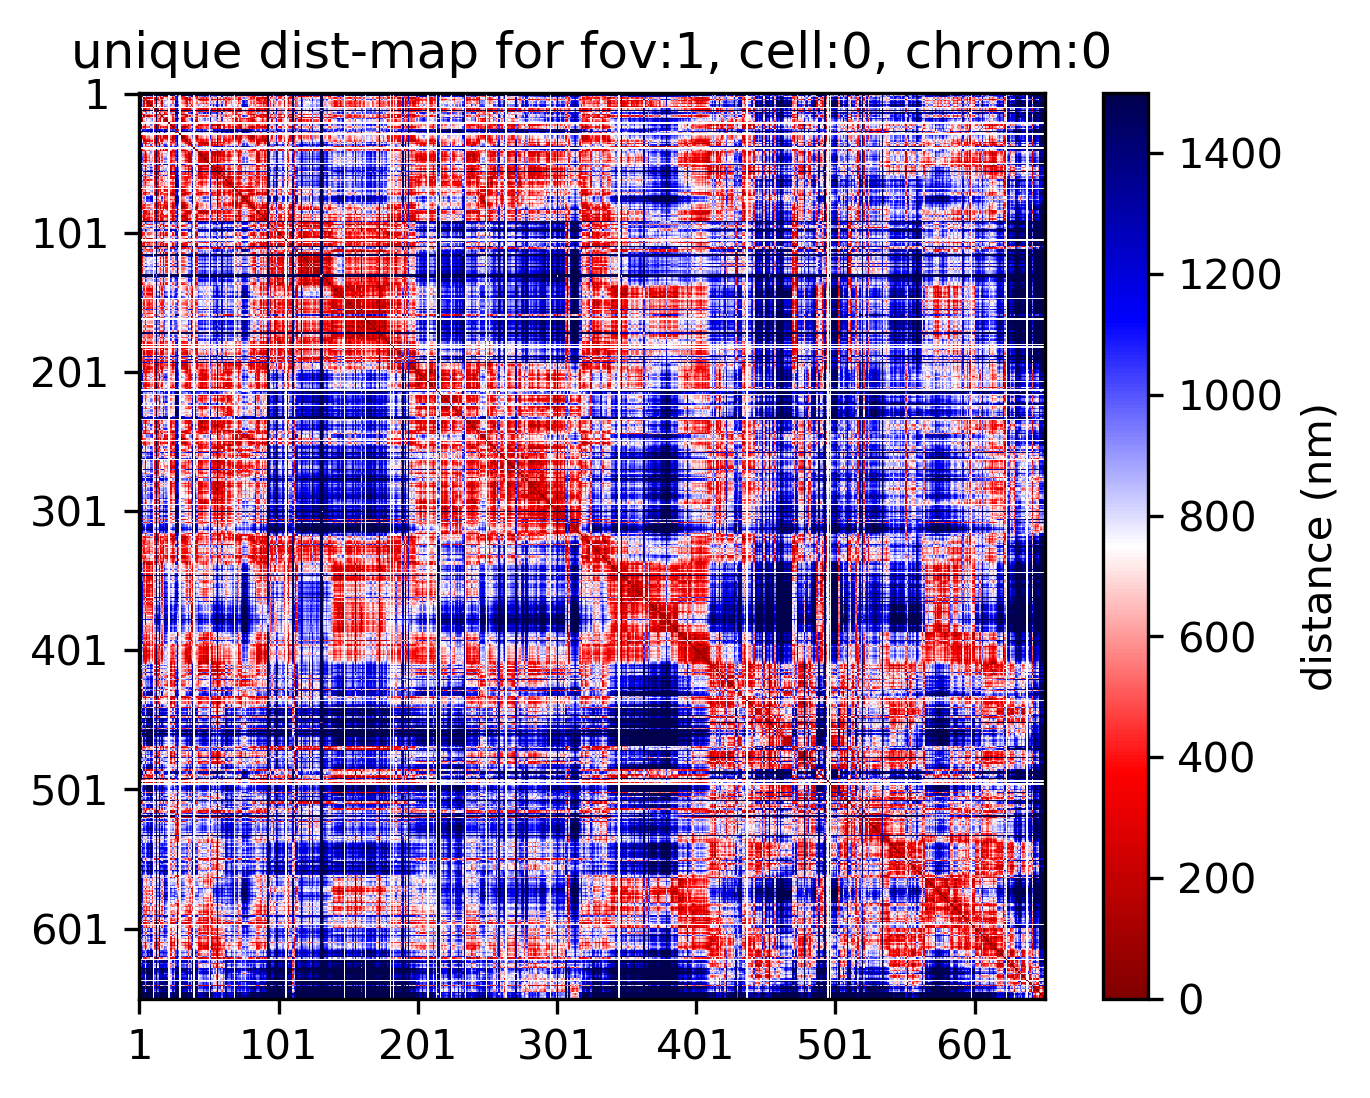

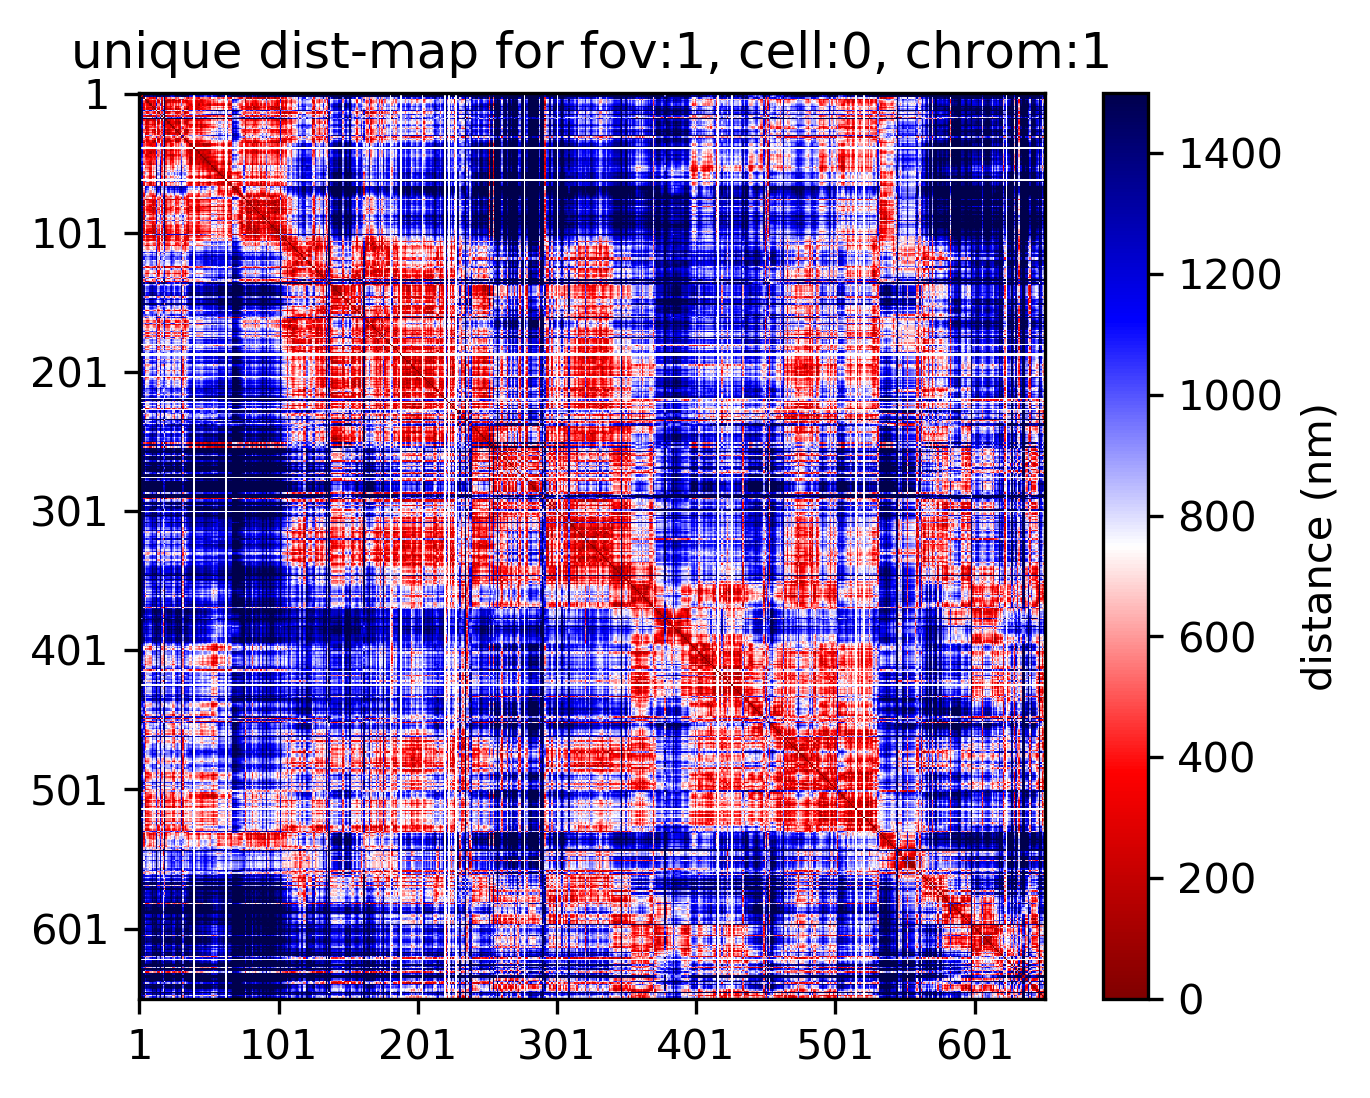

In [73]:
%matplotlib inline 
overwrite_distmap = True

EM_picked_points = dna._pick_spots('unique', 'EM', 
                                   _intensity_th=1., _check_th=-2.5, _check_percentile=2.5,
                                   _local_size=5, _w_ctdist=3, _w_lcdist=0.5, _w_int=3.5, _w_nbdist=0.5, 
                                   _distance_limits=[200,5000], _hard_dist_th=5000,
                                   _save_inter_plot=True, _save_to_info=True, _overwrite=overwrite_distmap)
distmaps = dna._generate_distance_map('unique','EM',_limits=[0,1500], _overwrite=overwrite_distmap, 
                                      _save_info=True, _save_plot=False)

--- dump coordinate information into .\fitted_image.pkl


<IPython.core.display.Javascript object>


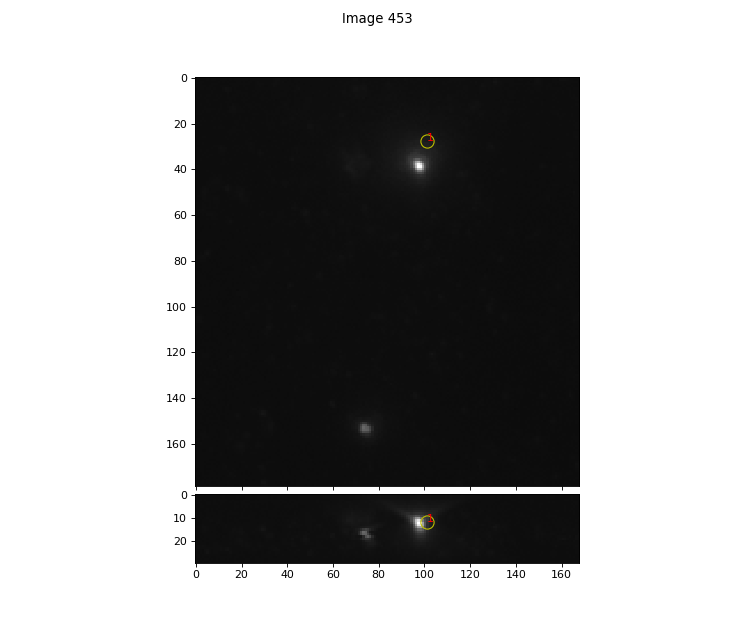

In [75]:
%matplotlib notebook
%matplotlib notebook

visualize_fitted_spot_images(dna.unique_ims, dna.EM_picked_unique_spots[1][:,1:4], np.array(dna.unique_ids)-1)

- Start EM picking gene spots, fov:1, cell:0.
- EM picking spots for 86 regions, use chrom_coords:True
-- filtering spots by intensity threshold=1.0.
-- initialize EM by naively picking spots!
--- EM iter:0, time: 0.353, change_ratio=0.5930232558139535
--- EM iter:1, time: 0.340, change_ratio=0.0
-- check spot for 86 spots
--- use all spots as reference, current thresholds: [-7.731 -5.814 -7.5  ]
--- applying stringency check for 86 spots, threshold=-7.5
--- 20 spots didn't pass stringent quality check.
-- check spot for 86 spots
--- use all spots as reference, current thresholds: [-6.212 -5.765 -7.5  ]
--- applying stringency check for 86 spots, threshold=-6.212207805037863
--- 20 spots didn't pass stringent quality check.
- saving cell_info to file:\\dolly\Raw_data\puzheng\201907-DNA_unique\fov-1\cell-0\cell_info.pkl
-- loading existing info from file: \\dolly\Raw_data\puzheng\201907-DNA_unique\fov-1\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['EM_picked_gene_spots

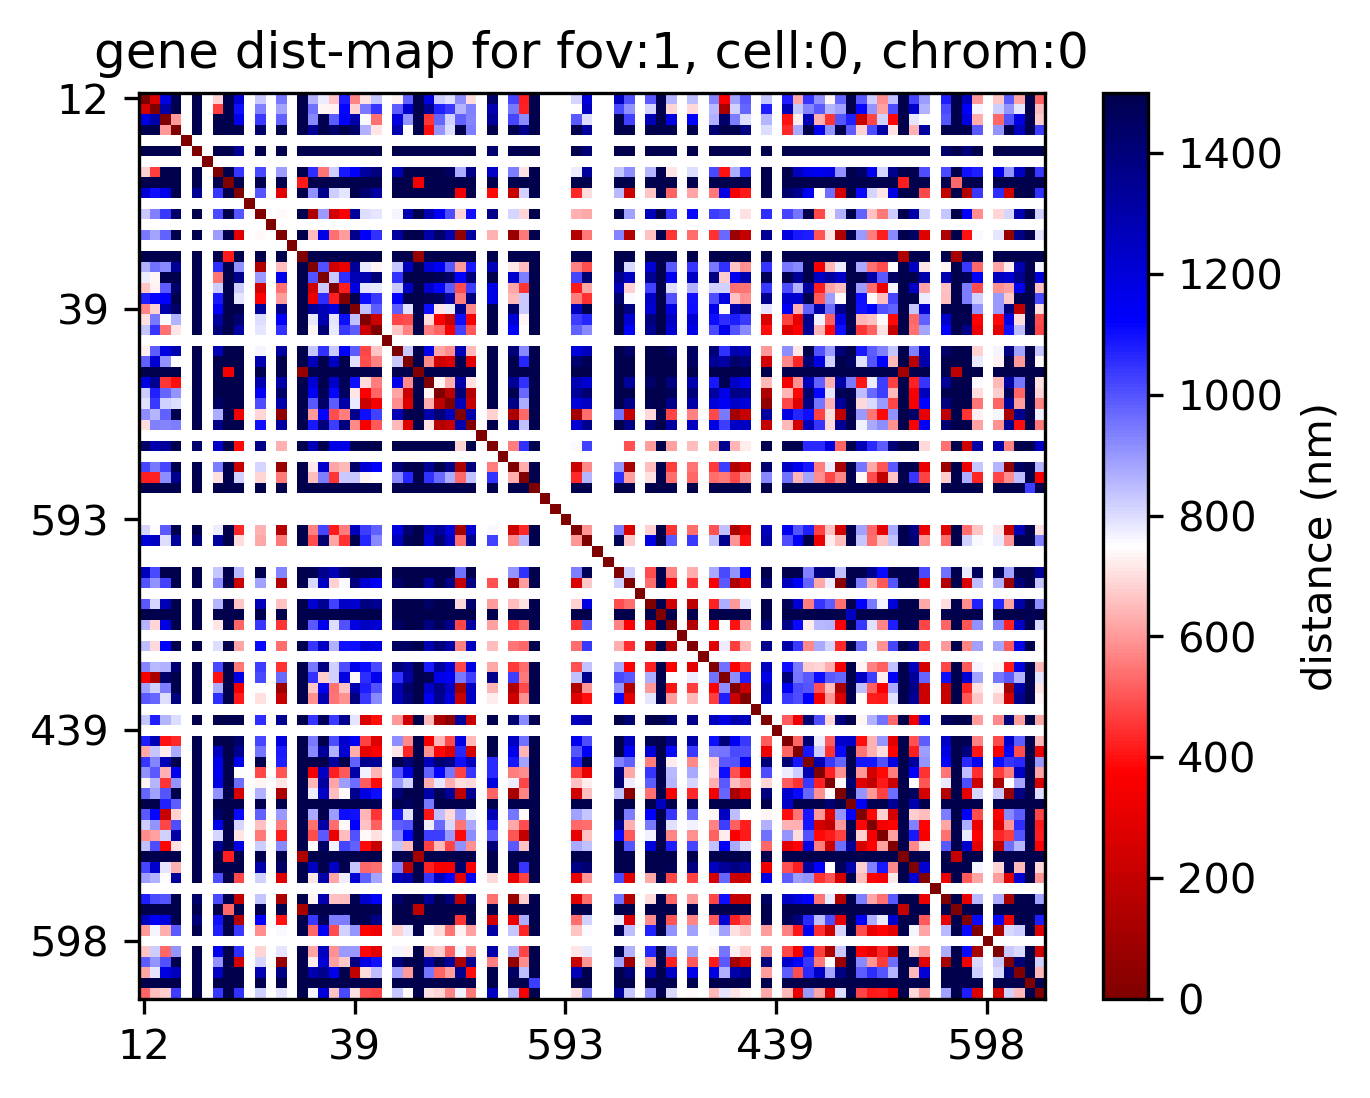

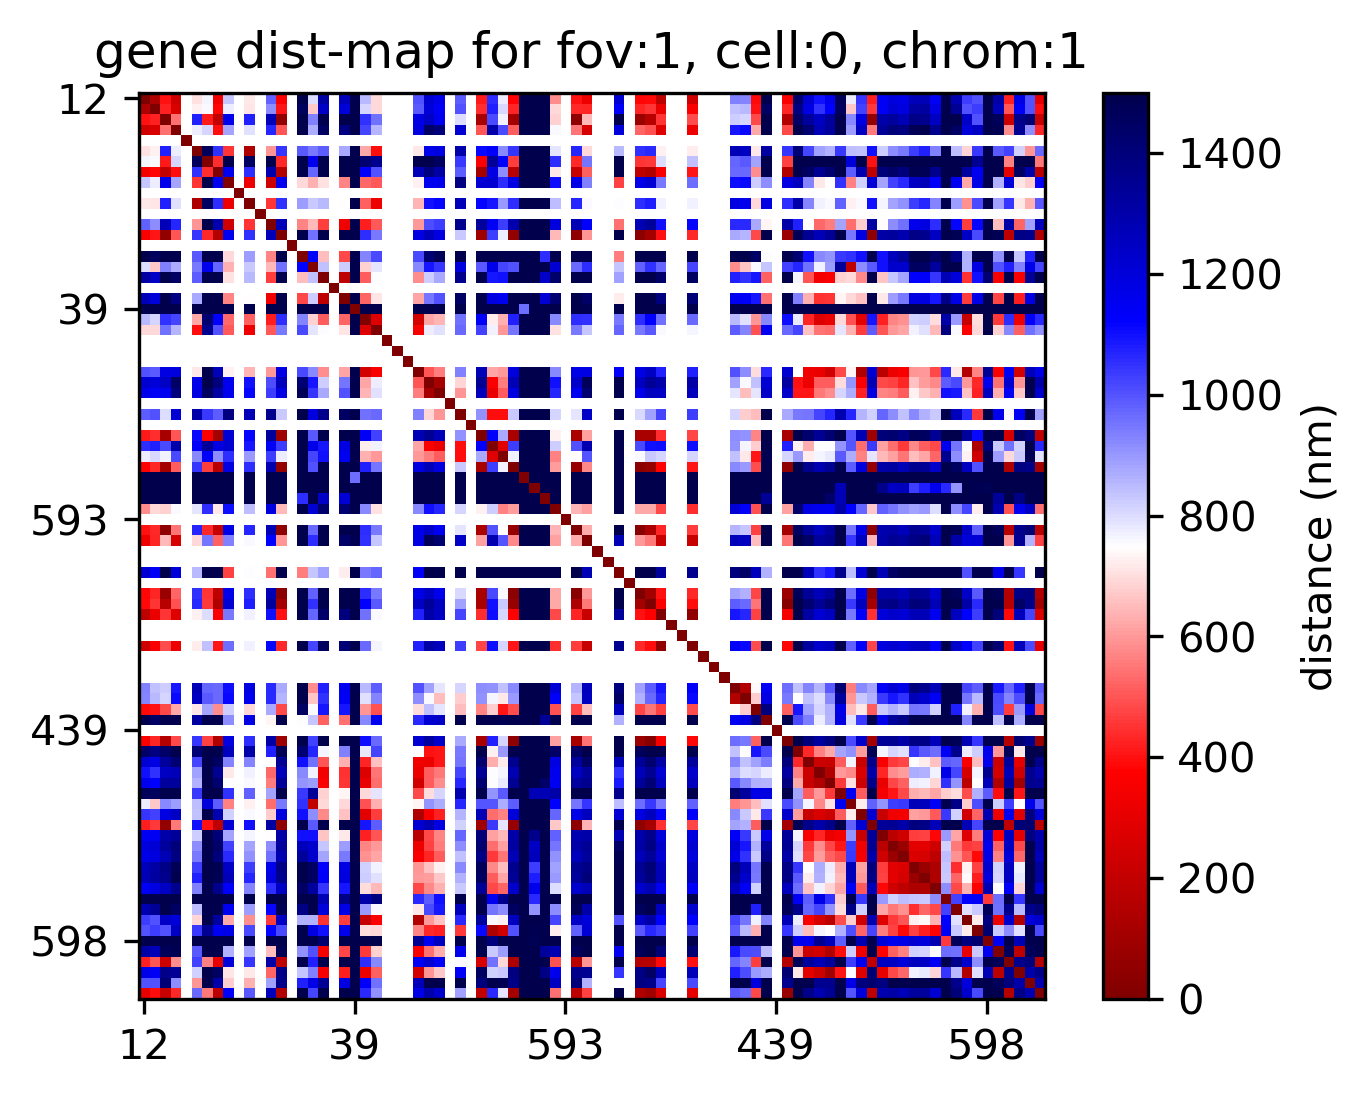

In [86]:
%matplotlib inline 
EM_picked_points = dna._pick_spots('gene', 'EM', 
                                   _ref_spot_list='unique', 
                                   _intensity_th=1.0, _check_th=-1., _check_percentile=5,
                                   _w_ctdist=3, _w_lcdist=0.5, _w_int=4, _w_nbdist=0.5,
                                   _distance_limits=[200,5000], _hard_dist_th=5000,
                                   _save_inter_plot=True, _save_to_info=True, _overwrite=True)
distmaps = dna._generate_distance_map('gene','EM',_limits=[0,1500], _overwrite=True, 
                                      _save_info=True, _save_plot=False)

--- dump coordinate information into .\fitted_image.pkl


<IPython.core.display.Javascript object>


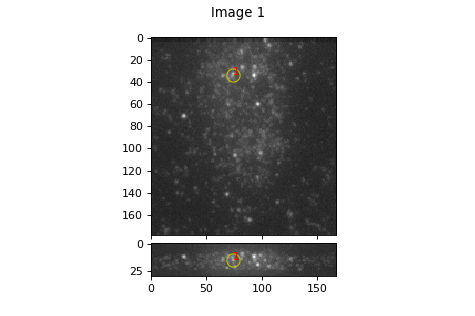

In [87]:
%matplotlib notebook
%matplotlib notebook

visualize_fitted_spot_images(dna.gene_ims, dna.EM_picked_gene_spots[0][:,1:4], np.arange(86))

In [15]:
picked_inds = []
for _gid, _gdic in dna.gene_dic.items():
    if 'DNA_id' in _gdic:
        _ind = np.where(np.array(dna.unique_ids)==int(_gdic['DNA_id']))[0]
        picked_inds.append(_ind[0])
picked_inds = np.sort(np.array(picked_inds))

sel_distmaps = [_d[:, picked_inds][picked_inds] for _d in dna.EM_unique_distance_map]
for _distmap in sel_distmaps:
    plt.figure(dpi=200)
    plt.imshow(_distmap, vmin=0, vmax=1500, cmap='seismic_r')
    plt.colorbar()
    plt.show()

# translate chromosome to RNA

Not fully supported yet

In [ ]:
# initialize cell-list parameter dict
param = {'data_folder':r'Y:\20190616_IMR90_CTP05_intronRNA',
         'fov_id': fov_id,
         'cell_id': cell_id,
         'save_folder':r'\\mendel\Mendel_SSD3\Pu_temp\IMR90_wt_RNA',
         'experiment_type': 'RNA',
         'num_threads': 32,
         'correction_folder':r'D:\Corrections',
         };
# create cell_list object
rna_lst = ia.classes.Cell_Data(param)
# change some global settings
rna_lst.shared_parameters['num_empty_frames'] = 0
rna_lst.shared_parameters['corr_Z_shift'] = False

# load existing cell_info, dont run for the first time
rna._load_from_file('cell_info')
# load segmentation
rna_seg, rna_seg_crop = rna._load_segmentation(_force=False)

## rotation

In [ ]:
rotation_mat = np.load(r'Y:\20190616_IMR90_CTP05_intronRNA\Experiment\rotation.npy')
